In [1]:
%load_ext autoreload
%autoreload 2

from epsilon_transformers.persistence import S3Persister, HackyPersister
from epsilon_transformers.training.configs.model_configs import RawModelConfig
from epsilon_transformers.process.processes import RRXOR, EvenProcess
from epsilon_transformers.analysis.activation_analysis import get_beliefs_for_transformer_inputs

import numpy as np
import torch
import plotly.express as px
import pathlib

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
even_process = EvenProcess(p=0.5)

In [3]:
even_process.is_unifilar

True

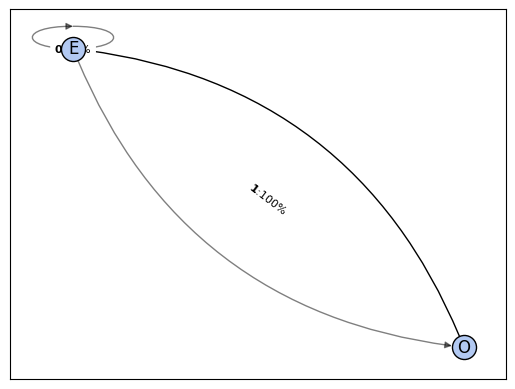

In [7]:
from epsilon_transformers.visualization.graph import transition_matrix_to_graph, visualize_graph
graph = transition_matrix_to_graph(transition_matrix=even_process.transition_matrix,state_names=even_process.state_names_dict)
visualize_graph(graph, draw_mixed_state=True)

In [9]:
mixed_state_tree = even_process.derive_mixed_state_presentation(depth=11)
MSP_transition_matrix = mixed_state_tree.build_msp_transition_matrix()
MSP_transition_matrix.shape

(2, 4, 4)

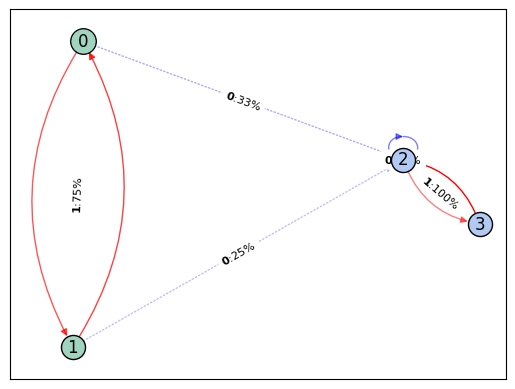

In [12]:
# make a process out of the transition matrix
from epsilon_transformers.process.processes import TransitionMatrixProcess
process = TransitionMatrixProcess(transition_matrix=MSP_transition_matrix)
graph = transition_matrix_to_graph(transition_matrix=MSP_transition_matrix)
visualize_graph(graph, draw_mixed_state=True, layout='spectral', draw_edge_labels=True, draw_color=True)
